## Проект по итогам раздела "Построение Дашбордов"

**Задание**

Необходимо выполнить несколько этапов для выполнения данного проекта. Первый будет заключаться в предварительной обработке данных, а второй — в визуализации средствами superset или Grafana. 

#  Этап 1 — Предварительная обработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Загрузка данных
df = pd.read_csv('data/preprocessed_student_data.csv')

In [3]:
# Обзор данных
df.head(3)

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
0,d12413d6-3617-4390-a956-0e56342dc881,Tracy Ramos,22.0,NaN,A,Science,2.99,70,Music,12,8.504874,21.75
1,a3176691-10eb-47aa-9aae-72660937d95a,Valerie Price,18.0,Female,C,Math,2.98,81,NaN,10,6.992983,9.34
2,31bfc4cd-3137-4d32-b920-665cce9dce0d,Zachary Grimes,25.0,NaN,C,Science,3.28,91,Sports,27,5.613224,19.45


In [4]:
df.describe(include='all')

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
count,103,103,91.000000,98,103,103,93.000000,103.000000,83,103.000000,103.000000,103.000000
unique,100,100,NaN,2,5,5,NaN,NaN,4,NaN,NaN,NaN
top,dbd9252a-4c91-4520-8a81-8948031d61ea,Samantha Green,NaN,Male,D,Math,NaN,NaN,Sports,NaN,NaN,NaN
freq,2,2,NaN,60,28,33,NaN,NaN,25,NaN,NaN,NaN
mean,NaN,NaN,22.725275,NaN,NaN,NaN,3.380430,84.436893,NaN,19.339806,7.057091,15.921845
std,NaN,NaN,8.907008,NaN,NaN,NaN,0.453767,9.221320,NaN,6.659143,1.135099,8.355548
min,NaN,NaN,18.000000,NaN,NaN,NaN,2.530000,70.000000,NaN,-5.000000,5.079151,1.110000
25%,NaN,NaN,20.000000,NaN,NaN,NaN,3.080000,77.000000,NaN,14.500000,6.054385,9.610000
50%,NaN,NaN,22.000000,NaN,NaN,NaN,3.340000,84.000000,NaN,19.000000,7.127454,16.350000
75%,NaN,NaN,23.000000,NaN,NaN,NaN,3.700000,91.500000,NaN,25.000000,8.010498,22.385000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_id                  103 non-null    object 
 1   name                        103 non-null    object 
 2   age                         91 non-null     float64
 3   gender                      98 non-null     object 
 4   grade                       103 non-null    object 
 5   major                       103 non-null    object 
 6   gpa                         93 non-null     float64
 7   attendance_rate             103 non-null    int64  
 8   extracurricular_activities  83 non-null     object 
 9   study_hours_per_week        103 non-null    int64  
 10  sleep_hours_per_day         103 non-null    float64
 11  distance_from_home_km       103 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 9.8+ KB


**Выводы из обзора данных:**
    
Мы имеем датасет о студентах, включающий в себя **103 строки** и **12 колонок** со следующей информацией:
- *student_id* - уникальный номер студента **(тип данных - object)**;
- *name* - имя студента **(тип данных - object)**;
- *age* - возраст студента **(тип данных - float64)**;
- *gender* - пол студента **(тип данных - object)**;
- *grade* - литер класса студента **(тип данных - object)**;
- *major* - основной предмет, изучаемый студентом **(тип данных - object)**;
- *gpa* - сдедний балл студента **(тип данных - float64)**;
- *attendance_rate* - рейтинг посещаемости **(тип данных - int64)**;
- *extracurricular_activities* - факультативные занятия **(тип данных - object)**;
- *study_hours_per_week* - количество учебных часов в неделю **(тип данных - int64)**;
- *sleep_hours_per_day* - продолжительность сна в день **(тип данных - float64)**;
- *distance_from_home_km* - дистанция от дома до университета в км **(тип данных - float64)**.

Сразу бросается в глаза после обзора вывода **df.describe(include='all')** и **df.info()**:
- *student_id* имеет 100 уникальных значений хотя должен иметь 103 - в датасете либо ошибка, либо дубликаты (*name* - тоже имеет 100 уникальных значений, но такое возможно, т.к. могут быть тезки);
- в колонке *age* (возраст студента) максимальное значение 80 при среднем возрасте 22.73, скорее всего это ошибочные данные, но не факт, я же учусь в свои 50, почему бы не поучится в 80;
- в колонке *study_hours_per_week* (количество учебных часов в неделю) минимальное значение отрицательное, чего не может быть;
- в данных имеются пропуски в колонках *age*, *gender*, *gpa*, *extracurricular_activities*.

In [6]:
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')

В датасете 2 дубликатов строк


Мы получили что в датасет 2 дублирующихся строки, но из **df.describe(include='all')** следует что их должно быть 3

In [7]:
#выведем строки с одинаковыми student_id

duplicateDFRow = df[df.duplicated(subset = 'student_id', keep = False)]
duplicateDFRow 

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
35,5ec00eb0-852f-48fa-a541-7007226762e6,Jeremiah Cook,21.0,Female,F,Math,3.47,84,Sports,17,5.374447,26.58
70,83ec585a-de63-4784-8a52-652288df5b59,Paul Alvarado,21.0,Male,B,Music,3.70,71,Debate,30,6.173272,25.13
87,dbd9252a-4c91-4520-8a81-8948031d61ea,Samantha Green,18.0,Female,D,Science,3.17,80,Clubs,12,7.205474,9.61
100,5ec00eb0-852f-48fa-a541-7007226762e6,Jeremiah Cook,21.0,Female,F,Math,3.47,84,Sports,17,5.374447,26.58
101,83ec585a-de63-4784-8a52-652288df5b59,Paul Alvarado,21.0,Male,B,Science,3.70,71,Debate,30,6.173272,25.13
102,dbd9252a-4c91-4520-8a81-8948031d61ea,Samantha Green,18.0,Female,D,Science,3.17,80,Clubs,12,7.205474,9.61


Как можно видеть для студента Paul Alvarad (student_id = 83ec585a-de63-4784-8a52-652288df5b59) строки отличаются по значения в колонке *major*

In [8]:
#посмотрим какие значения может принимать major
df.major.value_counts()

major
Math       33
Science    27
History    25
Art        17
Music       1
Name: count, dtype: int64

Очевидно значение основного предмета "Music" - является ошибочным, замение его на "Science" из дубликата записи и еще раз проверим количество дубликатов строк

In [9]:
#Замена "Music" на "Science"
df.loc[df['major'] == 'Music', 'major'] = 'Science'
# Проверка на дубликаты
print(f'В датасете {len(df) - len(df.drop_duplicates())} дубликатов строк')

В датасете 3 дубликатов строк


In [10]:
df.drop_duplicates(inplace = True) # Удаляем дубликаты
df.reset_index(drop = True, inplace = True) # Сбрасываем индекс

Преобразование выбросов и пропущенных значений в столбце *age*

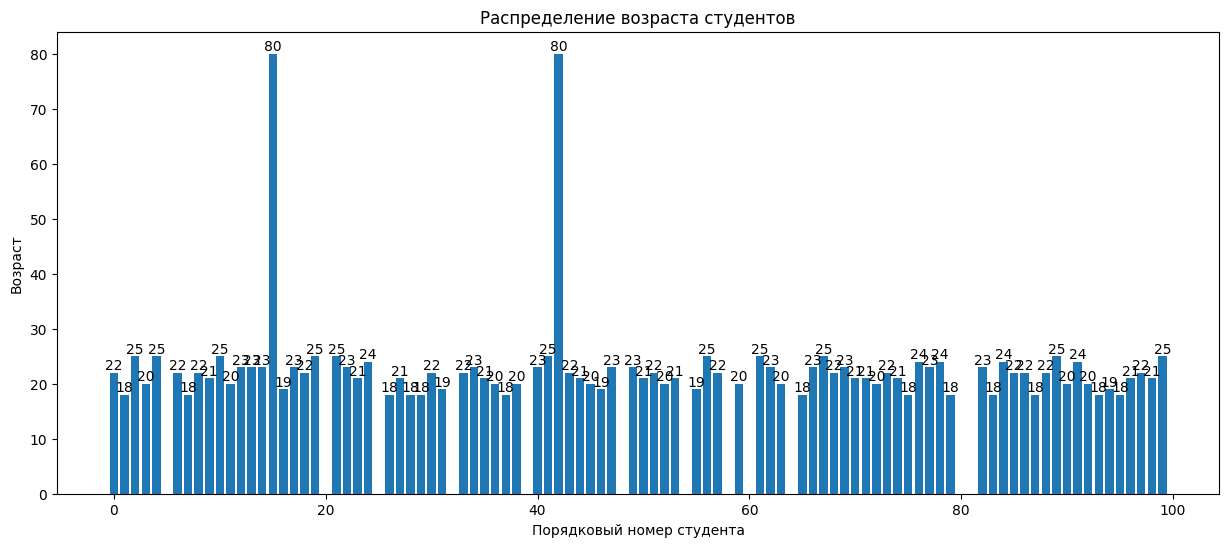

In [11]:
# Визуализация распределения возраста студентов
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.age.index, height = df.age.values) 
ax.set_title('Распределение возраста студентов')
ax.set_ylabel('Возраст')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])
plt.show();

In [12]:
# Проверка на пропущенные значения
df.age.isnull().sum()

12

В столбце *age* имеется два выброса со значением 80 и 12 пропусков значений

In [13]:
#Вывод строк с пропусками в столбце *age*
df_isna = df[df.age.isna()]
df_isna

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
5,a746b70d-313d-4bbc-9e55-5d873c424bd4,John Rice18.0,NaN,Male,D,History,3.93,74,Music,16,5.258102,24.26
20,01425035-877e-4702-8e8d-eedcf1ee5262,John Jones19.0,NaN,Male,D,History,3.78,88,Debate,23,7.885725,27.85
25,25ef88fc-a247-4139-b65a-29c7760d97ed,Sarah Schultz,NaN,Male,A,Science,3.32,81,Sports,17,6.939201,17.86
32,323fed62-12c8-4a6d-847e-3b27cafaf388,Krista Lewis,NaN,Female,D,Art,3.56,88,Sports,10,5.848377,1.93
39,d5035e3c-7d70-426e-9be3-539c1bed8888,John Haas24.0,NaN,Male,C,Math,3.42,99,Music,19,6.546183,4.19
48,9780bbc0-9aac-42ce-8a0f-ec4441fc6bad,John25.0,NaN,Male,D,Art,2.53,92,Sports,27,6.529856,28.56
54,d238120b-1c55-4d02-b541-444ff97fddc2,Ernest Smith,NaN,Male,A,Math,3.82,74,Clubs,30,5.900026,2.00
58,6b0482cd-be8e-4a6f-8e97-0f0e5a43f3cf,Brian Myers,NaN,Female,C,History,3.08,78,Sports,15,6.757540,13.70
60,c39d40f2-13ec-4bd2-b143-d49bb35b4dc0,Katherine Stewart,NaN,NaN,D,Art,3.55,92,NaN,29,5.717145,22.19
64,0a7a3c40-5251-4921-8cbb-a208ae315911,Charles Rhodes,NaN,Female,D,History,NaN,71,NaN,-5,8.689591,22.40


Вывод показывает,что часть значений столбца *age* слиплись со значениями столбца *name*. Проверю есть ли еще такие строки

In [14]:
#Вывод всех строк, в которых столбец name содержит цифры
df_name_age = df[df.name.str.contains('\d')]
df_name_age

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
5,a746b70d-313d-4bbc-9e55-5d873c424bd4,John Rice18.0,NaN,Male,D,History,3.93,74,Music,16,5.258102,24.26
20,01425035-877e-4702-8e8d-eedcf1ee5262,John Jones19.0,NaN,Male,D,History,3.78,88,Debate,23,7.885725,27.85
39,d5035e3c-7d70-426e-9be3-539c1bed8888,John Haas24.0,NaN,Male,C,Math,3.42,99,Music,19,6.546183,4.19
48,9780bbc0-9aac-42ce-8a0f-ec4441fc6bad,John25.0,NaN,Male,D,Art,2.53,92,Sports,27,6.529856,28.56


In [15]:
#Создание временного датафрейма с разделенными значениями имени и возраста
df_temp = df_name_age.name.str.split(r'[\s|-]*(\d+\.?\d)', expand = True).set_axis(['name', 'age', 'x'], axis=1)
df_temp.reset_index(drop = True, inplace = True)
df_temp

,name,age,x
0,John Rice,18.0,
1,John Jones,19.0,
2,John Haas,24.0,
3,John,25.0,


In [16]:
#Удаление цифр из столбца 'name'
df['name'] = df['name'].str.replace(r'\d+\.?\d', '', regex=True) 
#Замена значений в столбце age на данные из временного датафрейма
for i in range(df_temp.shape[0]):
    for j in range(df.shape[0]):
        if df.loc[j,'name'] == df_temp.loc[i,'name']:
            df.loc[j,'age'] = df_temp.loc[i,'age']
df.age = df.age.astype(float) #Приведем тип в float

В контексте данной задачи будем считать что 80 лет, это ошибочный возраст студента. Заменим его и пропуски значений на среднее значение. Чтобы не учитывать выбросы при расчете среднего, посчитаю среденее усеченное без выбросов и пропусков

In [17]:
#Расчет среднего усеченного
trim_mean = round((df.age.sum() - df.age.max() * 2) / (df.age.notnull().sum() - 2), 1)
print(f' Среднее усеченное по возрату = {trim_mean}')

 Среднее усеченное по возрату = 21.5


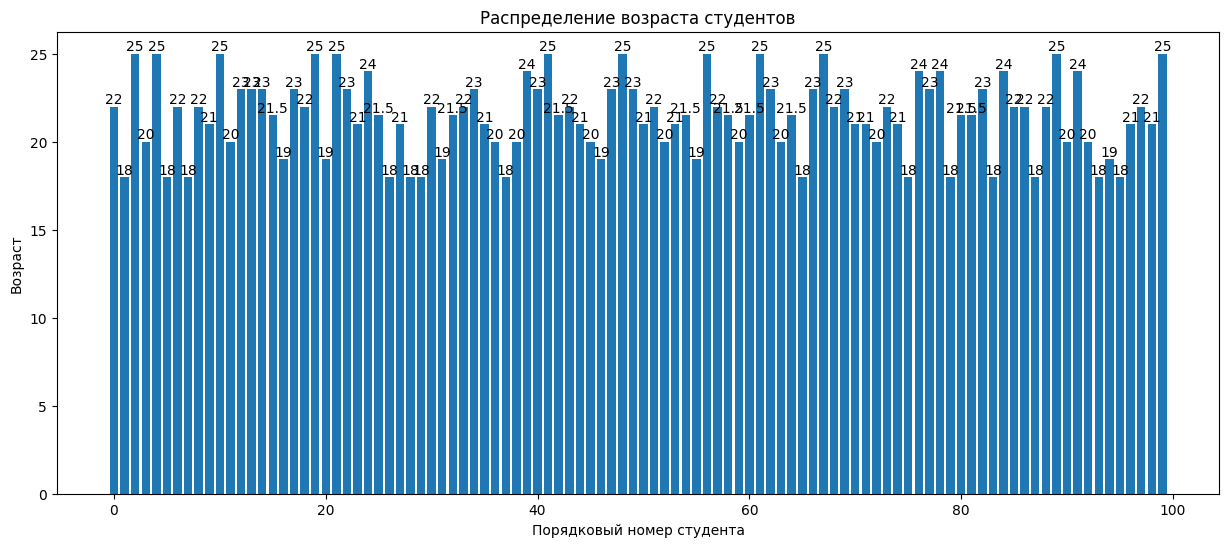

In [18]:
df.age.fillna(trim_mean, inplace = True) #Замена пропусков на среднее
df.loc[df['age'] == 80, 'age'] = trim_mean #Замена 80 на среднее
# Визуализация распределения возраста студентов
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.age.index, height = df.age.values) 
ax.set_title('Распределение возраста студентов')
ax.set_ylabel('Возраст')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])

plt.show();

Заполню пропуски в столбце *gender*

In [19]:
#Вывод строк с пропусками в столбце gender
df_isna = df[df.gender.isna()]
df_isna

,student_id,name,age,gender,grade,major,gpa,attendance_rate,extracurricular_activities,study_hours_per_week,sleep_hours_per_day,distance_from_home_km
0,d12413d6-3617-4390-a956-0e56342dc881,Tracy Ramos,22.0,NaN,A,Science,2.99,70,Music,12,8.504874,21.75
2,31bfc4cd-3137-4d32-b920-665cce9dce0d,Zachary Grimes,25.0,NaN,C,Science,3.28,91,Sports,27,5.613224,19.45
18,c1b57a49-7273-4dc1-857c-238440fad0d1,Kevin Harris,22.0,NaN,A,History,3.33,86,Sports,17,7.391928,13.26
60,c39d40f2-13ec-4bd2-b143-d49bb35b4dc0,Katherine Stewart,21.5,NaN,D,Art,3.55,92,NaN,29,5.717145,22.19
88,174567d1-2c97-45ca-8c3c-dcd2f3be3615,Laura Wall,22.0,NaN,F,Math,3.66,100,Debate,16,7.868639,8.35


Т.к. пропуско в столбце *gender* всего 5, я присвою значения пола соответсующие имени. Хотя у них может быть все, что угодно

In [20]:
df.loc[df['name'] == 'Tracy Ramos', 'gender'] = 'Female'
df.loc[df['name'] == 'Katherine Stewart', 'gender'] = 'Female'
df.loc[df['name'] == 'Laura Wall', 'gender'] = 'Female'
df.loc[df['name'] == 'Zachary Grimes', 'gender'] = 'Male'
df.loc[df['name'] == 'Kevin Harris', 'gender'] = 'Male'

Изучу средний бал студентов

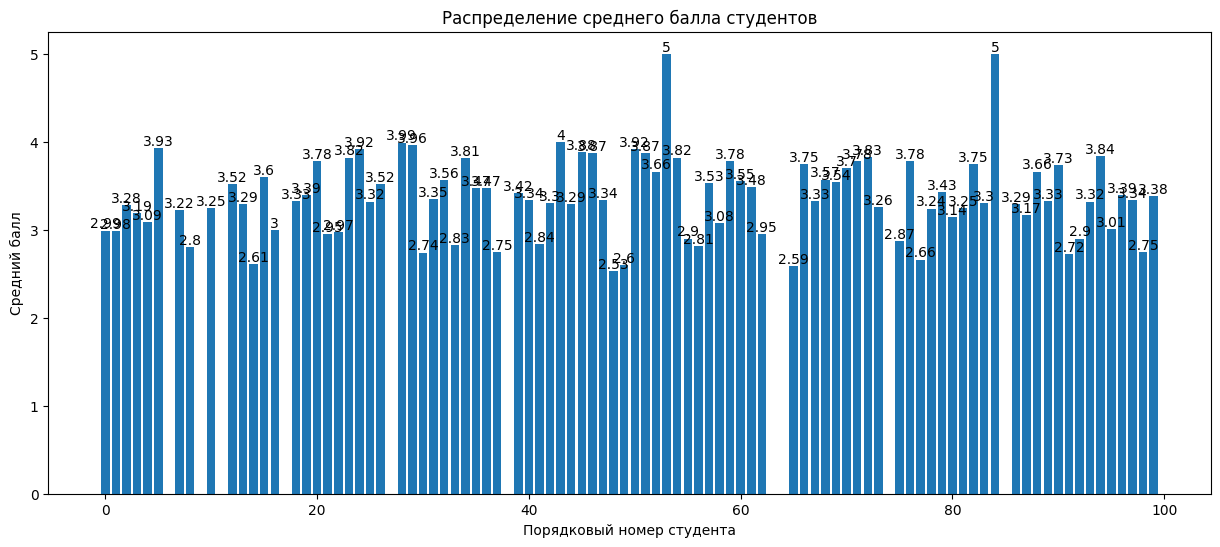

In [21]:
# Визуализация распределения среднего балла студентов
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.gpa.index, height = df.gpa.values) 
ax.set_title('Распределение среднего балла студентов')
ax.set_ylabel('Средний балл')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])
plt.show();

Я вижу пропуски значений и два выброса. С выбросами я ничего делать не буду т.к. среди 100 человек могут быть два круглых отличника

In [22]:
#Расчет среднего 
mean_ = round(df.gpa.mean(), 2)
print(f' Среднее по среднему баллу = {mean_}')
df.gpa.fillna(mean_, inplace = True) #Замена пропусков на среднее

 Среднее по среднему баллу = 3.38


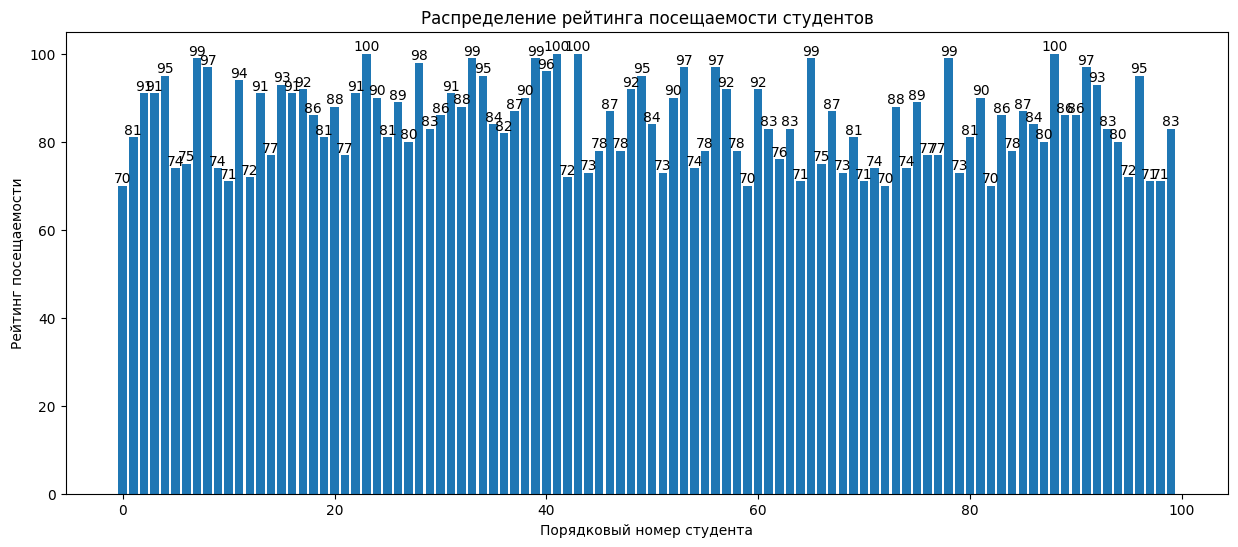

In [23]:
# Визуализация распределения рейтинга посещаемости студентов
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.attendance_rate.index, height = df.attendance_rate.values) 
ax.set_title('Распределение рейтинга посещаемости студентов')
ax.set_ylabel('Рейтинг посещаемости')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])

plt.show();

В рейтинге посещаемости я аномалий не наблюдаю

Обработка пропущенных значений в столбце еxtracurricular_activities

In [24]:
#Вывод количества пропусков в столбце еxtracurricular_activities
df.extracurricular_activities.isnull().sum()

20

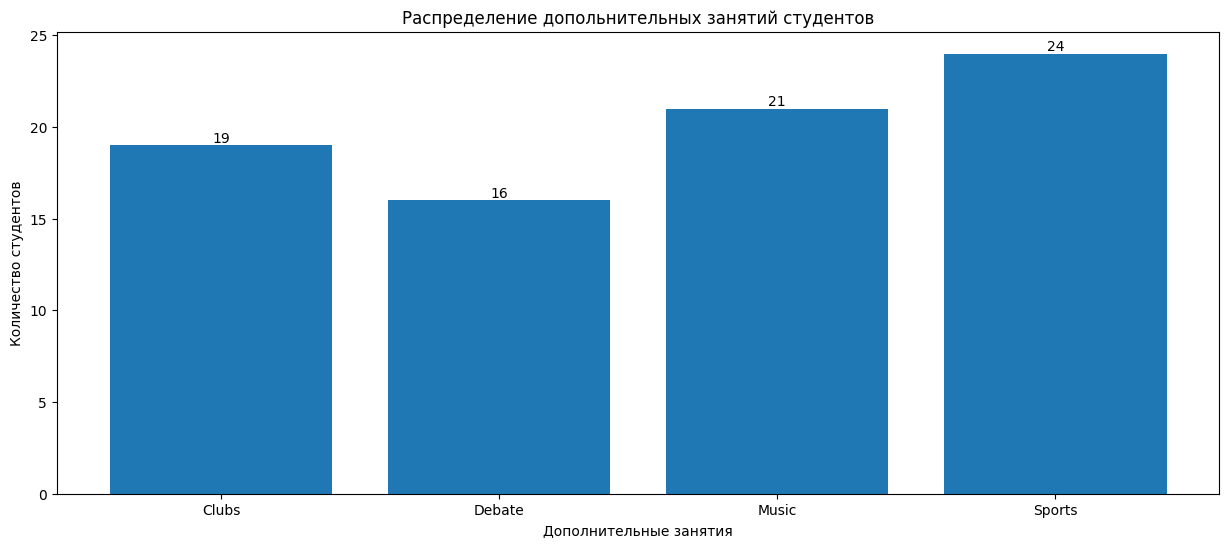

In [25]:
# Визуализация распределения допольнительных занятий студентов до обработки пропусков
df_ = df.groupby(by ='extracurricular_activities')[['extracurricular_activities']].value_counts()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение допольнительных занятий студентов')
ax.set_ylabel('Количество студентов')
ax.set_xlabel('Дополнительные занятия')
ax.bar_label (ax.containers [ 0 ])

plt.show();

Заменю пропуски значений в extracurricular_activities случайными значениями из extracurricular_activities

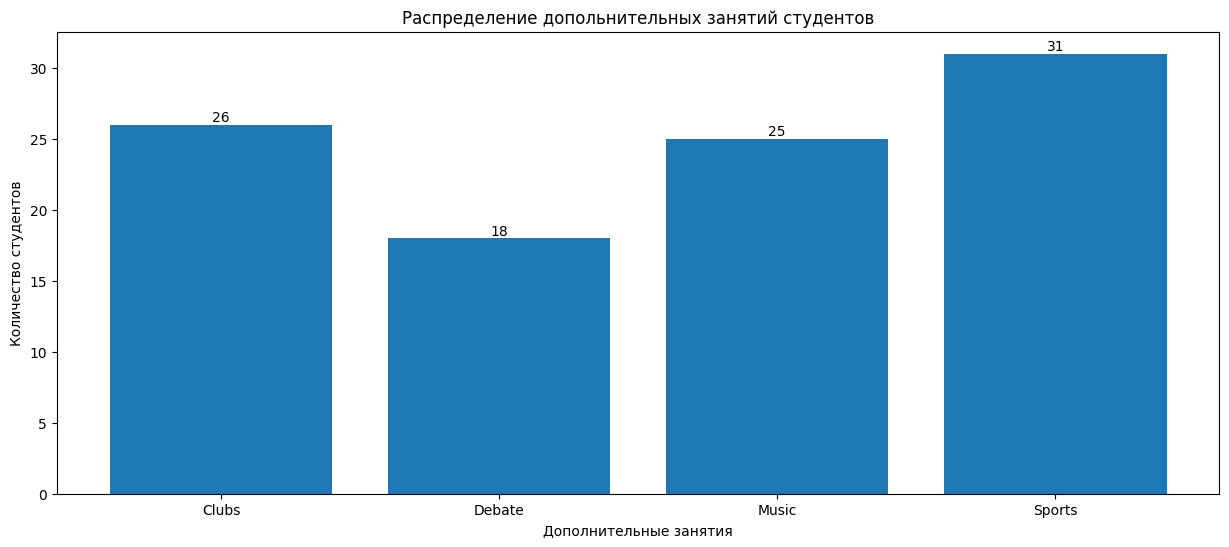

In [27]:
#Создаю список уникальных значений
df_ = df.groupby(by ='extracurricular_activities')[['extracurricular_activities']].value_counts()
a = df_.index.tolist()
#Заменяю nan на случайное значение из списка
for j in range(df.shape[0]):        
        if pd.isnull (df.loc[j,'extracurricular_activities']) == True :
            df.loc[j,'extracurricular_activities'] = random.choice(a)
# Визуализация распределения допольнительных занятий студентов после обработки пропусков
df_ = df.groupby(by ='extracurricular_activities')[['extracurricular_activities']].value_counts()
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df_.index, height = df_.values) 
ax.set_title('Распределение допольнительных занятий студентов')
ax.set_ylabel('Количество студентов')
ax.set_xlabel('Дополнительные занятия')
ax.bar_label (ax.containers [ 0 ])
plt.show();

Обработка количества часов обучения в неделю

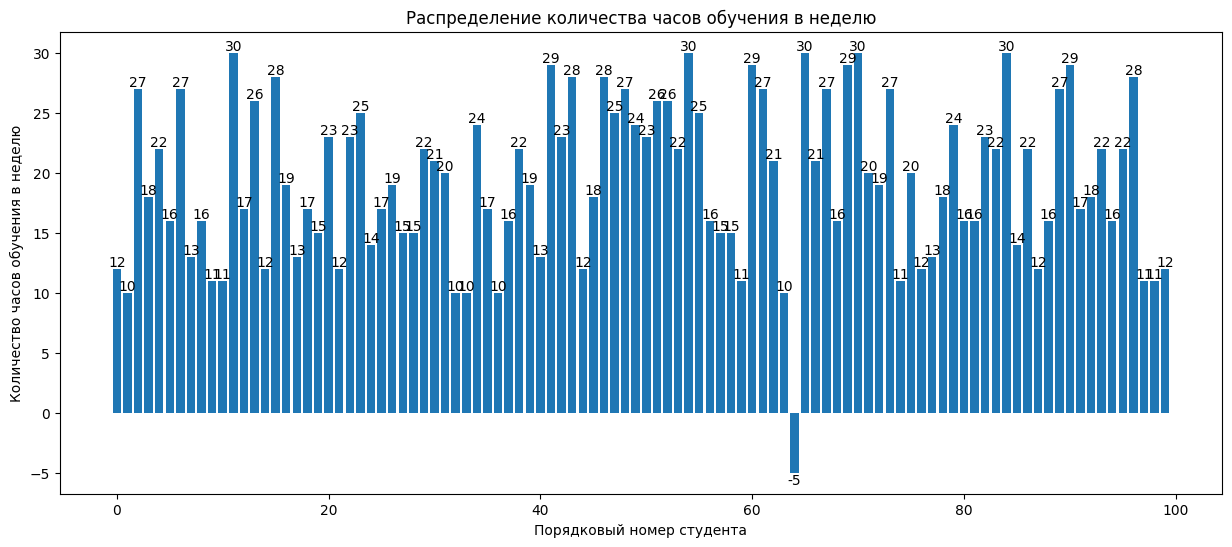

In [28]:
# Визуализация распределения количества часов обучения в неделю
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.study_hours_per_week.index, height = df.study_hours_per_week.values) 
ax.set_title('Распределение количества часов обучения в неделю')
ax.set_ylabel('Количество часов обучения в неделю')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])

plt.show();

На диаграмме видно, что в столбце имеется ошибочное значение -5

Заменю его на среднее количества часов обучения в неделю без учета самого ошибочного значения.

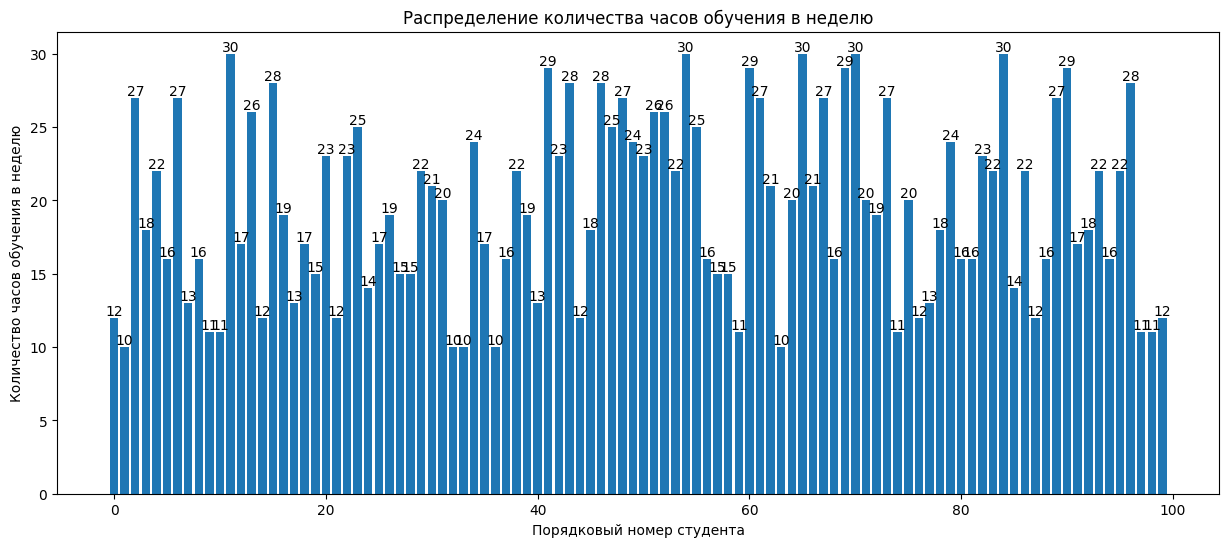

In [29]:
n = df[df.study_hours_per_week  > 0].shape[0] # Количество положительных значений
s = df[df.study_hours_per_week  > 0].study_hours_per_week.sum() # Сумма положительных значений
mean_ = round(s / n, 0) # Среднее количества часов обучения в неделю без учета самого ошибочного значения
df.loc[df['study_hours_per_week'] < 0, 'study_hours_per_week'] = mean_  #Замена  на среднее

# Визуализация распределения количества часов обучения в неделю после замены
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.study_hours_per_week.index, height = df.study_hours_per_week.values) 
ax.set_title('Распределение количества часов обучения в неделю')
ax.set_ylabel('Количество часов обучения в неделю')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])
plt.show();


Исследую продолжительности сна студентов

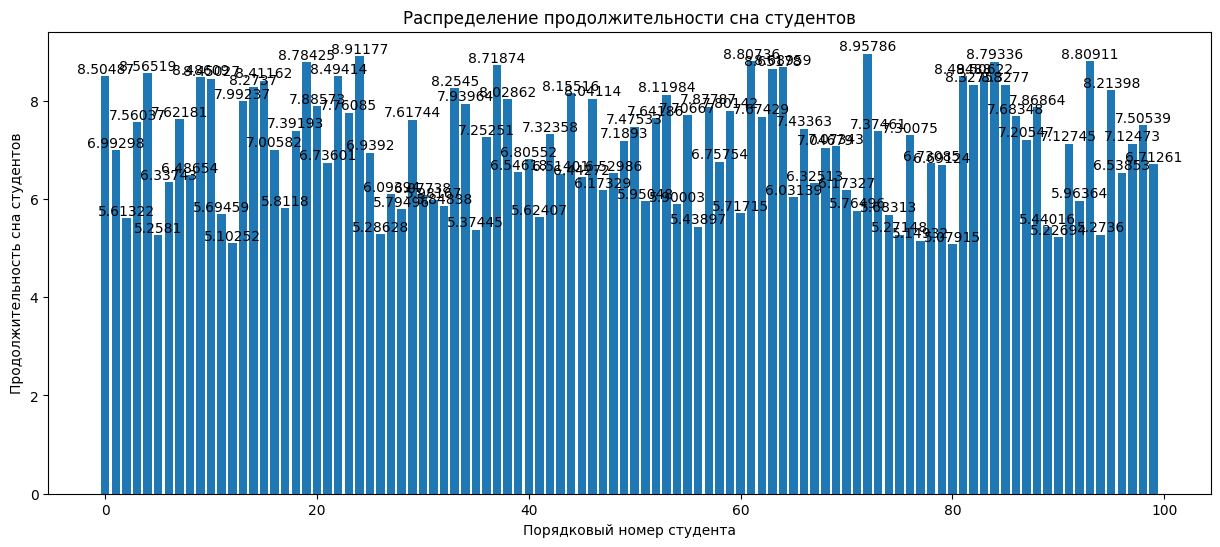

In [30]:
## Визуализация распределения продолжительности сна студентов
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.sleep_hours_per_day.index, height = df.sleep_hours_per_day.values) 
ax.set_title('Распределение продолжительности сна студентов')
ax.set_ylabel('Продолжительность сна студентов')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])

plt.show();

Я не наблюдаю аномалий в столбце продолжительности сна студентов

Исследую столбец с расстоянием от дома студента до университета

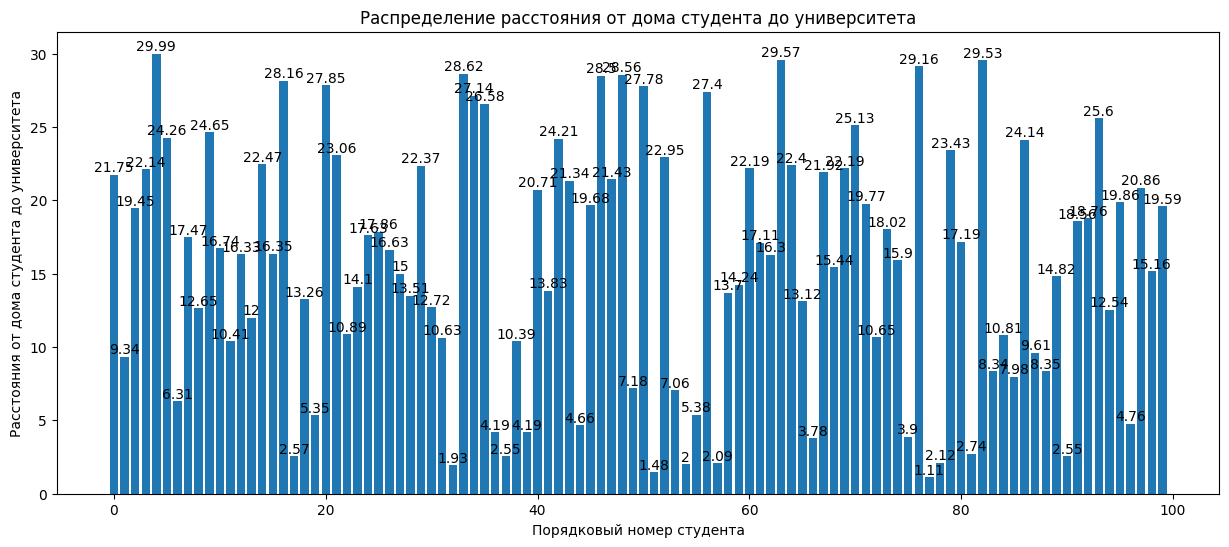

In [31]:
# Визуализация распределения расстояния от дома студента до университета
fig, ax =  plt.subplots(1, figsize = [15, 6])
ax.bar(x = df.distance_from_home_km.index, height = df.distance_from_home_km.values) 
ax.set_title('Распределение расстояния от дома студента до университета')
ax.set_ylabel('Расстояния от дома студента до университета')
ax.set_xlabel('Порядковый номер студента')
ax.bar_label (ax.containers [ 0 ])

plt.show();

Я не вижу аномалий в столбце расстояния от дома студента до университета

In [32]:
# Сохранение очищенного датасета в csv
df.to_csv (r'data/clear_student_data.csv', index= False )

# 2. Визуализация в SUPERSET

![Визулизация в SUPERSET](data/superset.jpg "Визулизация в SUPERSET")

Из визуализации можно сделать следующие выводы:
- Возраст и Пол
    - распределение возраста по полу равномерное;
    - в целом мужчин больше чем женщин;
- Количество Часов Сна и Процент Посещаемости:
    - продолжительность сна студента не влияет на посещаемость
- Специальность и Внеклассные Занятия
    - большше всего студентов изучают математику, меньше - искусство
    - среди внеклассных занятий меньше всего на дебатах
- Распределение Оценок:
    - наиболее частый средний балл 3.38
    - в целом студенты учатся на троечу
- Средний Балл и Количество Часов Учебы:
    - количество часов учебы не влияет на средний балл
- Расстояние от Дома:
    - большинство студентов живет дальше 10 км от университета
    - лишь 3 студента живут рядом с универом